# <font color='Purple'>**Yearly Water Usage Prediction using LSTM_RNN**</font>


## <font color='green'>**Table of Contents**</font>
>[Yearly Water Usage Prediction using LSTM_RNN](#scrollTo=vp8WoBLHNC8w)

>>[1. Dataset Information](#scrollTo=HFsotPcgdHii)

>>[2. Import the Required Libraries & Modules](#scrollTo=ZwUbH7LWdKKv)

>>[3. Load the Monthly Sunspot dataset](#scrollTo=Gl38CKbdO5TU)

>>[4. Time Series Visualization](#scrollTo=nxXlB8AgR8af)

>>[5. Data Preprocessing](#scrollTo=7mvSo65USHm5)

>>>[5.1 Splitting Data into Train & Test set](#scrollTo=EmOgUQLRdp0W)

>>>>[Define a format_data function for Splitting Data](#scrollTo=q32TWU0USpM2)

>>>[5.2 Create Independent & Dependent Variables](#scrollTo=rvBa4oijUMha)

>>>>[Define a prepare data function to create independent & dependent variables for Train data & Test data](#scrollTo=rvBa4oijUMha)

>>[6. Implementing Linear Regression](#scrollTo=r-lArFU2BfPq)

>>>>[Define a model_evaluation function](#scrollTo=XpQGdHkVOKi5)

>>[7. RNN_LSTM Model Development & Evaluation](#scrollTo=aKBD97MGSv6S)

>>>>[Define a LSTM_RNN function to build RNN model](#scrollTo=ZZOqfnLpVRRZ)

>>[8. Prediction using LSTM_RNN Model](#scrollTo=hfKrVIZFZTcV)

>>>>[LSTM_RNN model prediction using test data](#scrollTo=hfKrVIZFZTcV)

>>>>[LSTM_RNN model prediction using while loop](#scrollTo=jtTTRLo9CjBt)



## <font color='green'>**1. Dataset Information**</font>
The dataset provides 79 years of yearly water usage in the units of liters per capita per day in Baltimore from 1885 to 1963 and is credited to Hipel and McLeod, 1994.

## <font color='green'>**2. Import the Required Libraries & Modules**</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

## <font color='green'>**3. Load the Yearly Water Usage dataset**</font>

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/yearly-water-usage.csv'
df = pd.read_csv(url)
df

,Year,Water
0,1885,356
1,1886,386
2,1887,397
3,1888,397
4,1889,413
...,...,...
74,1959,594
75,1960,587
76,1961,587
77,1962,625


## <font color='green'>**4. Time Series Visualization**</font>

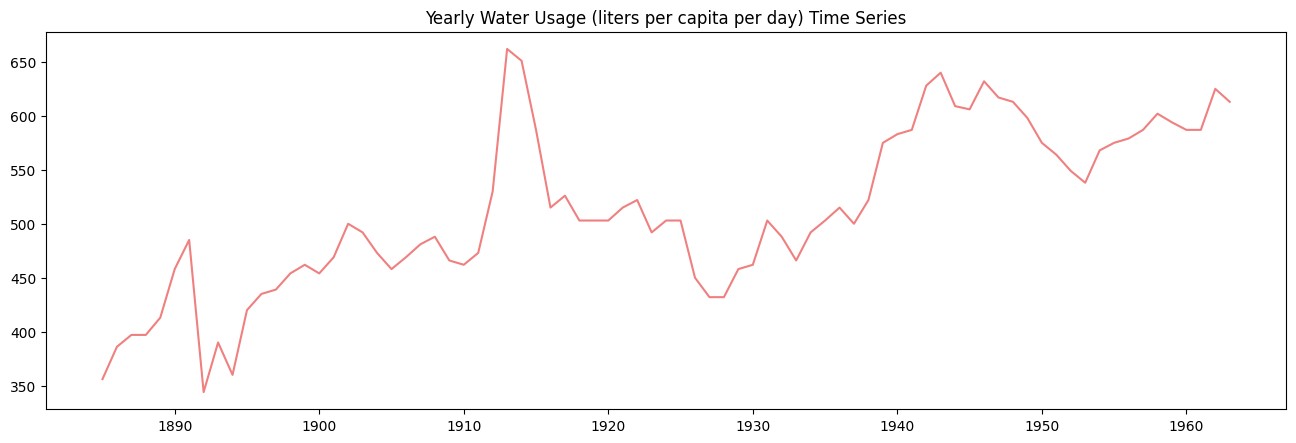

In [3]:
plt.figure(figsize=(16,5), dpi = 100)
plt.plot(df.Year, df.Water, color='lightcoral')
plt.title('Yearly Water Usage (liters per capita per day) Time Series')
plt.show();

## <font color='green'>**5. Data Preprocessing**</font>

### <font color='orange'>**5.1 Splitting Data into Train & Test set**</font>

In [4]:
n = len(df)
# split
split_percent=0.8
split = int(n*split_percent)
train_data = df[:split]
test_data = df[split:]

#### <font color='magenta'>**Define a format_data function for Splitting Data**</font>

In [5]:
def format_data(url, split_percent=0.8):
    data = pd.read_csv(url)
    n = len(data)
    # split
    split = int(n*split_percent)
    train_data = data[:split]['Water']
    test_data = data[split:]['Water']
    return train_data, test_data, data

In [6]:
water_usage_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/yearly-water-usage.csv'
train_data, test_data, data = format_data(water_usage_url)
n_steps = 3
train_data[0:5], test_data, data.head()

(0    356
 1    386
 2    397
 3    397
 4    413
 Name: Water, dtype: int64, 63    613
 64    598
 65    575
 66    564
 67    549
 68    538
 69    568
 70    575
 71    579
 72    587
 73    602
 74    594
 75    587
 76    587
 77    625
 78    613
 Name: Water, dtype: int64,    Year  Water
 0  1885    356
 1  1886    386
 2  1887    397
 3  1888    397
 4  1889    413)

### <font color='orange'>**5.2 Create Independent & Dependent Variables**</font>
#### <font color='magenta'>**Define a prepare data function to create independent & dependent variables for Train data & Test data**</font>

In [7]:
def prepare_data(time_series, n_steps):
  X,y=[],[]
  for i in range(len(time_series)):
    end=i+n_steps

    if end> len(time_series)-1:
      break

    seqX,seqy= time_series[i:end], time_series[end]
    X.append(seqX)
    y.append(seqy)

  return np.array(X), np.array(y)

X,y= prepare_data(time_series = train_data, n_steps = 3)
test_data= test_data.tolist()
X_test, y_test = prepare_data(time_series = test_data, n_steps = 3)
X[0:5],y[0:5]

(array([[356, 386, 397],
        [386, 397, 397],
        [397, 397, 413],
        [397, 413, 458],
        [413, 458, 485]]), array([397, 413, 458, 485, 344]))

## <font color='green'>**6. Implementing Linear Regression**</font> 

In [8]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(X, y)
# Predicting over the Train Set and calculating error
train_predict = lr.predict(X)
test_predict = lr.predict(X_test)
train_mae = mean_absolute_error(train_predict, y)
print('Training Mean Absolute Error', train_mae)
train_rmse= math.sqrt(mean_squared_error(y, train_predict))
print('Training Root Mean Square Error', train_rmse )
test_mae = mean_absolute_error(test_predict, y_test)
print('Testing Mean Absolute Error', test_mae)
test_rmse= math.sqrt(mean_squared_error(y_test, test_predict))
print('Training Root Mean Square Error', test_rmse )

Training Mean Absolute Error 22.672826307038118
Training Root Mean Square Error 34.8135193357618
Testing Mean Absolute Error 13.51440546925443
Training Root Mean Square Error 18.595102333234177


#### <font color='magenta'>**Define a model_evaluation function**</font>

In [9]:
def model_evaluation(y, ypred, model_name): 
       
    # Model Evaluation metrics
    print("\n Model Evaluation Report: ")
    print('Mean Absolute Error(MAE) of', model_name,':', mean_absolute_error(y, ypred))
    print('Mean Squared Error(MSE) of', model_name,':', mean_squared_error(y, ypred))
    print('Root Mean Squared Error (RMSE) of', model_name,':', mean_squared_error(y, ypred, squared = False))
    print('\n')
    
    # Actual vs Predicted Scatter Plot
    f, ax = plt.subplots(figsize=(15,8),dpi=50);
    plt.scatter(y, ypred, label="Actual vs Predicted")
    # Perfect predictions
    plt.xlabel('Yearly Water Usage Values')
    plt.ylabel('Predicted Yearly Water Usage Values')
    plt.title('Expection vs Prediction')
    plt.plot(y,y,'r', label="Perfect Expected Prediction")
    plt.legend()
      
    # Actual vs Predicted Plot
    print('\n')
    fig,ax=plt.subplots(figsize=(15,8), dpi=50)
    plt.plot(y, label='Actual values', color = 'blue')
    plt.plot(ypred, label='Predicted values', color = 'red')
    plt.legend(loc='best')
    plt.title(f'Actual vs Predicted for {model_name}')
    plt.show();


 Model Evaluation Report: 
Mean Absolute Error(MAE) of Linear Regression Prediction for test data : 13.51440546925443
Mean Squared Error(MSE) of Linear Regression Prediction for test data : 345.77783078345107
Root Mean Squared Error (RMSE) of Linear Regression Prediction for test data : 18.595102333234177






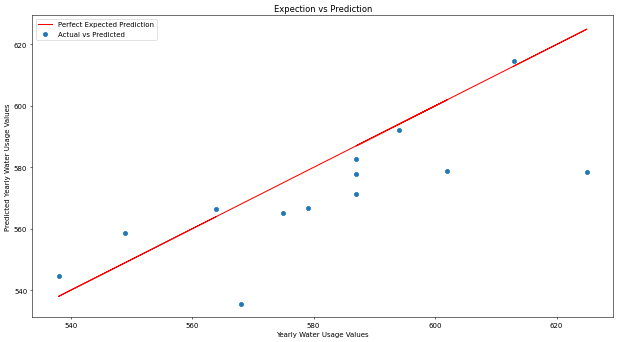

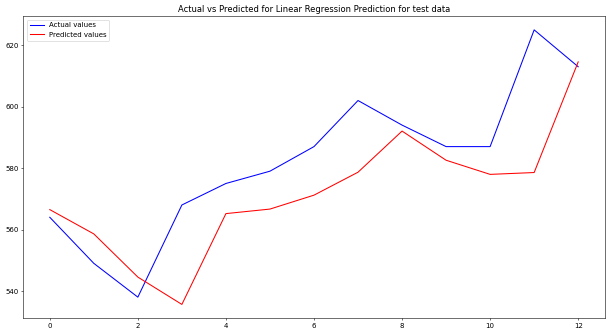

In [10]:
model_evaluation(y_test, test_predict, 'Linear Regression Prediction for test data')

## <font color='green'>**7. RNN_LSTM Model Development & Evaluation**</font>

In [11]:
X.shape

(60, 3)

In [12]:
n_features=1
X= X.reshape((X.shape[0]), (X.shape[1]), n_features)
X.shape

(60, 3, 1)

In [13]:
X_test= X_test.reshape((X_test.shape[0]), (X_test.shape[1]), n_features)
X_test.shape

(13, 3, 1)

In [14]:
# 1. Define LSTM Model
model= Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True,input_shape=(n_steps,n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
# 2. Compile Model
model.compile(optimizer='adam', loss='mse')
# 3. Fit Model
model.fit(X,y, epochs=300, verbose=1)

Epoch 1/300
2/2 [==============================] - 6s 22ms/step - loss: 244437.6719
Epoch 2/300
2/2 [==============================] - 0s 19ms/step - loss: 228237.4531
Epoch 3/300
2/2 [==============================] - 0s 19ms/step - loss: 226225.3281
Epoch 4/300
2/2 [==============================] - 0s 18ms/step - loss: 223580.8125
Epoch 5/300
2/2 [==============================] - 0s 13ms/step - loss: 219155.0312
Epoch 6/300
2/2 [==============================] - 0s 18ms/step - loss: 212015.5625
Epoch 7/300
2/2 [==============================] - 0s 24ms/step - loss: 206507.2344
Epoch 8/300
2/2 [==============================] - 0s 29ms/step - loss: 202202.9844
Epoch 9/300
2/2 [==============================] - 0s 18ms/step - loss: 198909.2031
Epoch 10/300
2/2 [==============================] - 0s 15ms/step - loss: 195522.4531
Epoch 11/300
2/2 [==============================] - 0s 20ms/step - loss: 191821.3125
Epoch 12/300
2/2 [==============================] - 0s 19ms/step - loss: 1

#### <font color='magenta'>**Define a LSTM_RNN function to build RNN model**</font>

In [15]:
def LSTM_RNN(hidden_unit, dense_unit, activation):
  # 1. Define Model
  model= Sequential()
  model.add(LSTM(hidden_unit, activation, input_shape = input_shape, return_sequences=True))
  model.add(LSTM(hidden_unit, activation))
  model.add(Dense(dense_unit))
  # 2. Compile Model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [16]:
input_shape=(n_steps,n_features)
model= LSTM_RNN(hidden_unit =50, dense_unit =1, activation='relu')
# 3. Model fit
history =  model.fit(X,y, epochs=300, verbose=1)

Epoch 1/300
2/2 [==============================] - 5s 13ms/step - loss: 245467.6094
Epoch 2/300
2/2 [==============================] - 0s 12ms/step - loss: 235938.4375
Epoch 3/300
2/2 [==============================] - 0s 11ms/step - loss: 227238.4688
Epoch 4/300
2/2 [==============================] - 0s 10ms/step - loss: 218918.4844
Epoch 5/300
2/2 [==============================] - 0s 11ms/step - loss: 203778.4844
Epoch 6/300
2/2 [==============================] - 0s 10ms/step - loss: 190740.7656
Epoch 7/300
2/2 [==============================] - 0s 10ms/step - loss: 186556.5625
Epoch 8/300
2/2 [==============================] - 0s 11ms/step - loss: 181619.6094
Epoch 9/300
2/2 [==============================] - 0s 16ms/step - loss: 176407.7031
Epoch 10/300
2/2 [==============================] - 0s 11ms/step - loss: 171009.9688
Epoch 11/300
2/2 [==============================] - 0s 11ms/step - loss: 165615.3125
Epoch 12/300
2/2 [==============================] - 0s 11ms/step - loss: 1

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 50)             10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


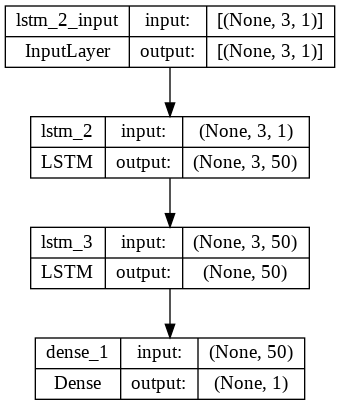

In [18]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

2/2 [==============================] - 0s 7ms/step - loss: 842.2738
Loss is 842.2738037109375


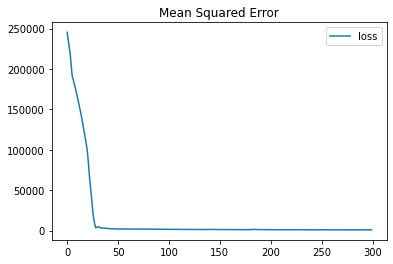

In [19]:
# 4. Evaluate Model
loss = model.evaluate(X, y)
print("Loss is", loss)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss']].plot(title="Mean Squared Error");

## <font color='green'>**8. Prediction using LSTM_RNN Model**</font>
#### <font color='magenta'>**LSTM_RNN model prediction using test data**</font>

In [20]:
train_predict= model.predict(X)
test_predict= model.predict(X_test)

1/1 [==============================] - 0s 19ms/step


In [21]:
def print_error(y, y_test, train_predict, test_predict):
  train_rmse= math.sqrt(mean_squared_error(y, train_predict))
  train_mae = mean_absolute_error(y, train_predict)

  test_rmse= math.sqrt(mean_squared_error(y_test, test_predict))
  test_mae = mean_absolute_error(y_test, test_predict)
  print('Training Mean Absolute Error', train_mae)
  print('Testing Mean Absolute Error', test_mae)
  print('Train RMSE : ', train_rmse)
  print('Test RMSE :', test_rmse)

In [22]:
print_error(y, y_test, train_predict, test_predict)

Training Mean Absolute Error 19.02591044108073
Testing Mean Absolute Error 20.500394381009617
Train RMSE :  29.021950837902462
Test RMSE : 26.087201235291527



 Model Evaluation Report: 
Mean Absolute Error(MAE) of LSTM_RNN for Train data : 19.02591044108073
Mean Squared Error(MSE) of LSTM_RNN for Train data : 842.2736304376274
Root Mean Squared Error (RMSE) of LSTM_RNN for Train data : 29.021950837902462






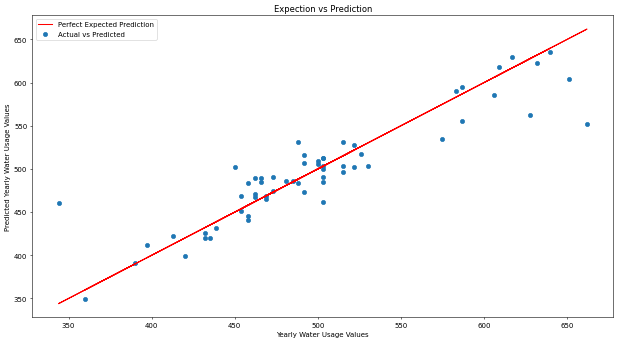

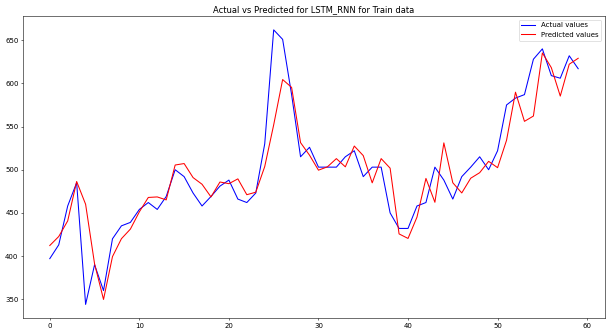

In [23]:
model_evaluation(y, train_predict, 'LSTM_RNN for Train data')


 Model Evaluation Report: 
Mean Absolute Error(MAE) of LSTM_RNN for test data : 20.500394381009617
Mean Squared Error(MSE) of LSTM_RNN for test data : 680.5420682905958
Root Mean Squared Error (RMSE) of LSTM_RNN for test data : 26.087201235291527






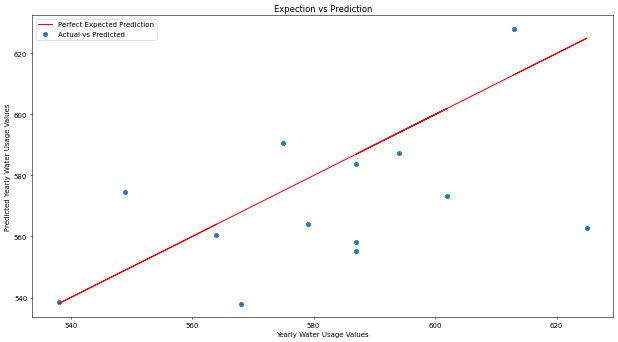

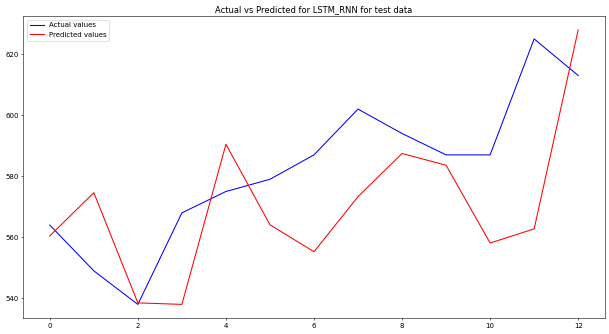

In [24]:
model_evaluation(y_test, test_predict, 'LSTM_RNN for test data')

In [25]:
train_data.tail()

58    640
59    609
60    606
61    632
62    617
Name: Water, dtype: int64

In [26]:
train_data[-3:].tolist()

[606, 632, 617]

#### <font color='magenta'>**LSTM_RNN model prediction using while loop**</font>

In [27]:
x_input= np.array(train_data[-3:].tolist())
temp= list(x_input)

output=[]
i=62
while i<78:
  if len(temp)>3:
    x_input= np.array(temp[1:])
    print("Year {} input is {}". format(i+1, x_input))
    x_input= x_input.reshape((1,n_steps, n_features)) 
    ypred= model.predict(x_input, verbose=0)
    print("Year {} output is {}". format(i+1, ypred))
    temp.append(ypred[0][0])
    temp=temp[1:]
    output.append(ypred[0][0])
    i=i+1

  else:
    print("Year 63 input is", x_input)
    x_input= x_input.reshape((1,n_steps, n_features))
    ypred= model.predict(x_input, verbose=0)
    print("Year 63 output is", ypred[0])
    temp.append(ypred[0][0])
    output.append(ypred[0][0])
    i=i+1

Year 63 input is [606 632 617]
Year 63 output is [615.99927]
Year 64 input is [632.         617.         615.99926758]
Year 64 output is [[599.0973]]
Year 65 input is [617.         615.99926758 599.09729004]
Year 65 output is [[546.66705]]
Year 66 input is [615.99927 599.0973  546.66705]
Year 66 output is [[526.3032]]
Year 67 input is [599.0973  546.66705 526.3032 ]
Year 67 output is [[506.0742]]
Year 68 input is [546.66705 526.3032  506.0742 ]
Year 68 output is [[513.49286]]
Year 69 input is [526.3032  506.0742  513.49286]
Year 69 output is [[516.6124]]
Year 70 input is [506.0742  513.49286 516.6124 ]
Year 70 output is [[507.4094]]
Year 71 input is [513.49286 516.6124  507.4094 ]
Year 71 output is [[494.3061]]
Year 72 input is [516.6124 507.4094 494.3061]
Year 72 output is [[503.52603]]
Year 73 input is [507.4094  494.3061  503.52603]
Year 73 output is [[519.48303]]
Year 74 input is [494.3061  503.52603 519.48303]
Year 74 output is [[512.7576]]
Year 75 input is [503.52603 519.48303 51

In [28]:
output

[615.99927,
 599.0973,
 546.66705,
 526.3032,
 506.0742,
 513.49286,
 516.6124,
 507.4094,
 494.3061,
 503.52603,
 519.48303,
 512.7576,
 514.04346,
 527.02155,
 534.1352,
 527.0333]

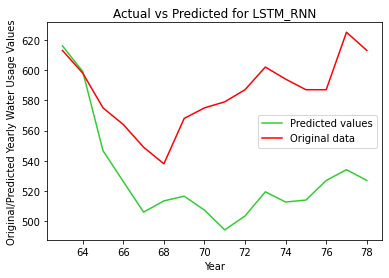

In [29]:
years= np.arange(63,79)
plt.plot(years, output, color = 'limegreen', label= 'Predicted values');
plt.plot(years, test_data, color = 'red', label = 'Original data')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Original/Predicted Yearly Water Usage Values')
plt.title(f'Actual vs Predicted for LSTM_RNN')
plt.show();


 Model Evaluation Report: 
Mean Absolute Error(MAE) of LSTM_RNN for test data using while loop : 66.6001234788161
Mean Squared Error(MSE) of LSTM_RNN for test data using while loop : 4860.810305236552
Root Mean Squared Error (RMSE) of LSTM_RNN for test data using while loop : 69.71951165374405






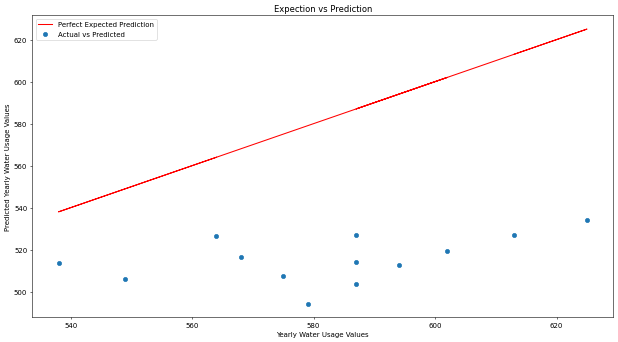

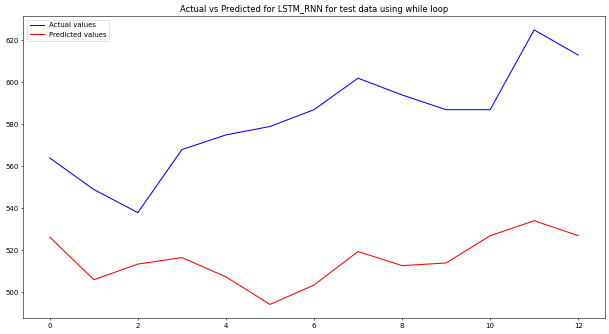

In [30]:
model_evaluation(y_test, output[3:], 'LSTM_RNN for test data using while loop')